<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Animacion_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICV513: Ingeniería de Costas
## Universidad Católica del Maule (UCM)
### Animación en 3D
#### Superposición de ondas

$$\eta_{sum} = \sum_{i=1}^{n} \eta_{i} = \frac{H_{i}}{2}\cos( k_{i}\cos(\theta_{i})x + k_{i} \sin(\theta_{i})y - \omega_{i}t)$$

In [1]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML

def disper(h,T,tol=1e-6):
  g = 9.81 #aceleracion de gravedad
  f = 1/T
  C = np.sqrt(g*h)
  kn_1 = 0
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if np.abs(k-kn_1)/(k) <= tol:
      break
    kn_1 = k
  return C

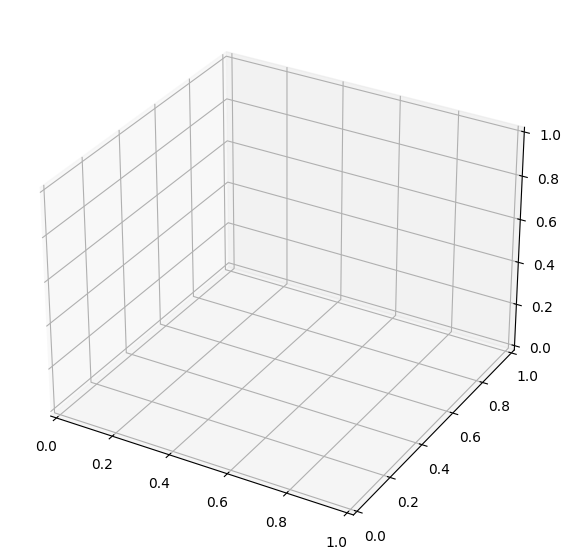

In [2]:
ancho = 7
alto  = 7

fig = plt.figure(figsize=(ancho,alto))
ax  = plt.axes(projection='3d')

In [3]:
#Inputs
H = np.array([0.5, 0.2, 3.0, 1.0, 0.75]) #(m)
theta = np.array([45, 75, 25, 10, 130])*(np.pi/180) # (rad)
#theta = np.array([0, 0, 0, 0, 0])*(np.pi/180) # (rad)
T = np.array([10, 15, 8, 12, 20]) #(s)
h = 50 #(m)

w = 2*np.pi/T # (rad/s)

k = np.zeros(len(T)) # (1/m)
L = np.zeros(len(T)) # (m)
for i in range(len(T)):
  C = disper(T[i],h)
  k[i] = w[i]/C
  L[i] = C*T[i]


Lmax = np.max(L)

dx = 1
x = np.arange(0,(2*Lmax)+dx,dx)
dy = 1
y = np.arange(0,(2*Lmax)+dy,dy)

X, Y = np.meshgrid(x,y)

surf = [ax.plot_surface(X,Y, np.zeros(np.shape(X)) )]

def animate(t):
  ax.clear()
  eta_sum = 0
  for i in range(len(T)):
    eta = (H[i]/2)*np.cos( (k[i]*np.cos(theta[i])*X) +  (k[i]*np.sin(theta[i])*Y) - (w[i]*t) )
    eta_sum = eta + eta_sum
  surf[0] = ax.plot_surface(X,Y,eta_sum)
  ax.set_zlim3d([-h, np.sum(H)])
  ax.set_xlabel('X (m)')
  ax.set_ylabel('Y (m)')
  ax.set_zlabel('Z (m)')
  ax.set_title('Estado de Mar')
  ax.view_init(30, 45+5*t)#2*np.pi*t) (elevacion, azimuth)
  return surf

t_total = 25 #(s)

anim = animation.FuncAnimation(fig,animate,frames=t_total, interval=200, blit=True)

HTML(anim.to_jshtml())